### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [1]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv(r'C:\Users\StrLab 4\SVM.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


All the data is float category and tha data is having null values

In [4]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

All the existing variables are numerical data. Hence no encoding of the data required.

In [5]:
#percentage of missing values in each attribute
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

 Mean of the integrated profile                   0.000000
 Standard deviation of the integrated profile     0.000000
 Excess kurtosis of the integrated profile       13.979216
 Skewness of the integrated profile               0.000000
 Mean of the DM-SNR curve                         0.000000
 Standard deviation of the DM-SNR curve           9.509442
 Excess kurtosis of the DM-SNR curve              0.000000
 Skewness of the DM-SNR curve                     4.855291
target_class                                     30.003352
dtype: float64

The target class having maximum percentage of the null values.  
The variable of Excess kurtosis of the integrated profile also had max. null values

In [6]:
#values of the target column
np.unique(df['target_class'])

array([ 0.,  1., nan])

In [7]:
# check the duplicates in dataset 
duplicate = df[df.duplicated()]
duplicate

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class


There is no duplicates in the dataset. 

In [8]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [9]:
class UnderstandingData:
    
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.raw_df_grouped = raw_df.groupby("target_class")
        self.class_name_no = 0
        self.class_name_yes = 1
        self.raw_df_grouped_no = self.raw_df_grouped.get_group(self.class_name_no)
        self.raw_df_grouped_yes = self.raw_df_grouped.get_group(self.class_name_yes)

    def plot_histogram_continuous(self, feature_name, bin_size):
        plt.figure()
        plt.hist(self.raw_df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.raw_df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")

    def plot_histogram_categorical(self, feature_name):
        feature_df = pd.DataFrame()
        feature_df["no"] = self.raw_df_grouped_no[feature_name].value_counts()
        feature_df["yes"] = self.raw_df_grouped_yes[feature_name].value_counts()
        
        feature_df.plot(kind='bar')
        plt.title("Feature Histogram - "+feature_name)
        plt.ylabel("Count")
        plt.xlabel("Feature unique values")
        plt.tight_layout()

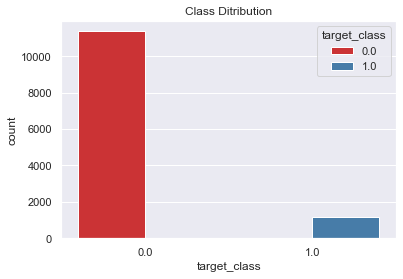

In [42]:
# Distribution of Target_Class
sns.countplot(x='target_class',data=df,hue="target_class",palette = "Set1")
plt.title('Class Ditribution')
plt.show()

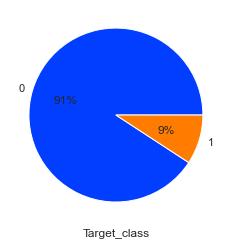

In [44]:
data = df.groupby('target_class').size()
palette_color = sns.color_palette('bright')
plt.pie(data,labels=[0,1],colors=palette_color, autopct='%.0f%%')
plt.xlabel('Target_class')
plt.show()

##The target class 1 havng 9% of data set variable, hence the data may be biased

##The bivariate analysis of counting the target class is not plotting accordingly.  

# Dealing with null values in dataset

'''The following methods are for the filling missing values
1. Deleting the columns with missing data
2. Deleting the rows with missing data
3. Filling the missing data with a value-Imputation
4. Imputation with an additional column
5. Filling with a Regression Model



isnull()
notnull()
dropna()
fillna()
replace()
interpolate()

data.replace(to_replace = np.nan, value = -99)
df.dropna(axis = 1)
df.interpolate(method ='linear', limit_direction ='forward')
data["Gender"].fillna("No Gender", inplace = True)
'''

## Method1: Linera interpolation of data

In [ ]:
' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'

In [10]:
# use the linear method of interpolation for filling with null values
df1 = df.interpolate(method ='linear', limit_direction ='forward')
df1

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,21.490281,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
17895,136.171875,48.924385,0.311671,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


The df1 dataset is having linrealry interpolated null values  

## Method 2: Mean-mode method

In [12]:
# use mean value method to fill the null values in the dataset
df2 = df.copy()

In [13]:
# The target_class is categorical data hence replace it with the mode where nulls are available
m = df2['target_class'].mode()[0]
df2['target_class']=df2['target_class'].fillna(m)
df2

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


In [14]:
# Replace the all the null values with mean value of each column seperately
df3 = df2.copy()
df3 = df2.fillna(df2.mean())
df3

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,26.373476,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
17895,136.171875,48.924385,0.480081,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


Use the mean value to fill the null values in the total dataset 

In [15]:
#Verify the nulls in the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [16]:
# General verification of target variable values.
np.unique(df3['target_class'])

array([0., 1.])

The df3 dataset is having average based null value filled dataset

# Dealing with scale and outliers

The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization.

In [17]:
cols = df1.select_dtypes(include=np.number).columns
cols1=cols[0:8]
cols1

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')

In [18]:
 # Standardization
    
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()


df1[cols1] = std_scaler.fit_transform(df1[cols1])

df1

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.392804,0.266468,-0.098623,-0.289157,-0.320490,-0.418546,-0.189456,-0.377026,0.0
1,-1.329757,-1.515998,0.229510,0.262404,-0.346590,-0.461963,0.246583,-0.020235,0.0
2,0.760401,0.976181,-0.334041,-0.335215,-0.334930,-0.210825,0.045453,-0.292756,0.0
3,1.766649,0.338508,-0.673828,-0.314795,0.164806,-0.256543,-1.186314,-0.927560,0.0
4,-1.024289,-1.524459,0.338541,0.243825,-0.333342,-0.302261,0.022515,-0.271292,0.0
...,...,...,...,...,...,...,...,...,...
17893,0.212507,0.670866,-0.464967,-0.316886,-0.274956,0.011245,-0.370302,-0.565062,0.0
17894,0.151901,1.057069,-0.096567,-0.312268,-0.333937,-0.290705,0.030457,-0.261187,0.0
17895,0.978157,0.347049,-0.160682,-0.276771,-0.332661,-0.403039,-0.100973,-0.336851,0.0
17896,-0.178541,0.367761,-0.224797,-0.264262,-0.348917,-0.574829,0.156345,-0.042607,0.0


In [19]:
np.unique(df1['target_class'])

array([0., 1.])

In [20]:
df3[cols1] = std_scaler.fit_transform(df3[cols1])

df3

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.392804,0.266468,-1.055655e-01,-0.289157,-0.320490,-4.289500e-01,-0.189456,-0.380490,0.0
1,-1.329757,-1.515998,2.349743e-01,0.262404,-0.346590,-4.735104e-01,0.246583,-0.019263,0.0
2,0.760401,0.976181,-3.498850e-01,-0.335215,-0.334930,-2.157589e-01,0.045453,-0.295173,0.0
3,1.766649,0.338508,-7.025195e-01,-0.314795,0.164806,-2.484437e-15,-1.186314,-0.937871,0.0
4,-1.024289,-1.524459,3.481281e-01,0.243825,-0.333342,-3.096029e-01,0.022515,-0.273442,0.0
...,...,...,...,...,...,...,...,...,...
17893,0.212507,0.670866,-4.857608e-01,-0.316886,-0.274956,1.215927e-02,-0.370302,-0.570865,0.0
17894,0.151901,1.057069,-1.034314e-01,-0.312268,-0.333937,-2.977427e-01,0.030457,-0.263211,0.0
17895,0.978157,0.347049,-1.344613e-15,-0.276771,-0.332661,-4.130347e-01,-0.100973,-0.339816,0.0
17896,-0.178541,0.367761,-2.365101e-01,-0.264262,-0.348917,-5.893494e-01,0.156345,-0.041913,0.0


In [21]:
np.unique(df3['target_class'])

array([0., 1.])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

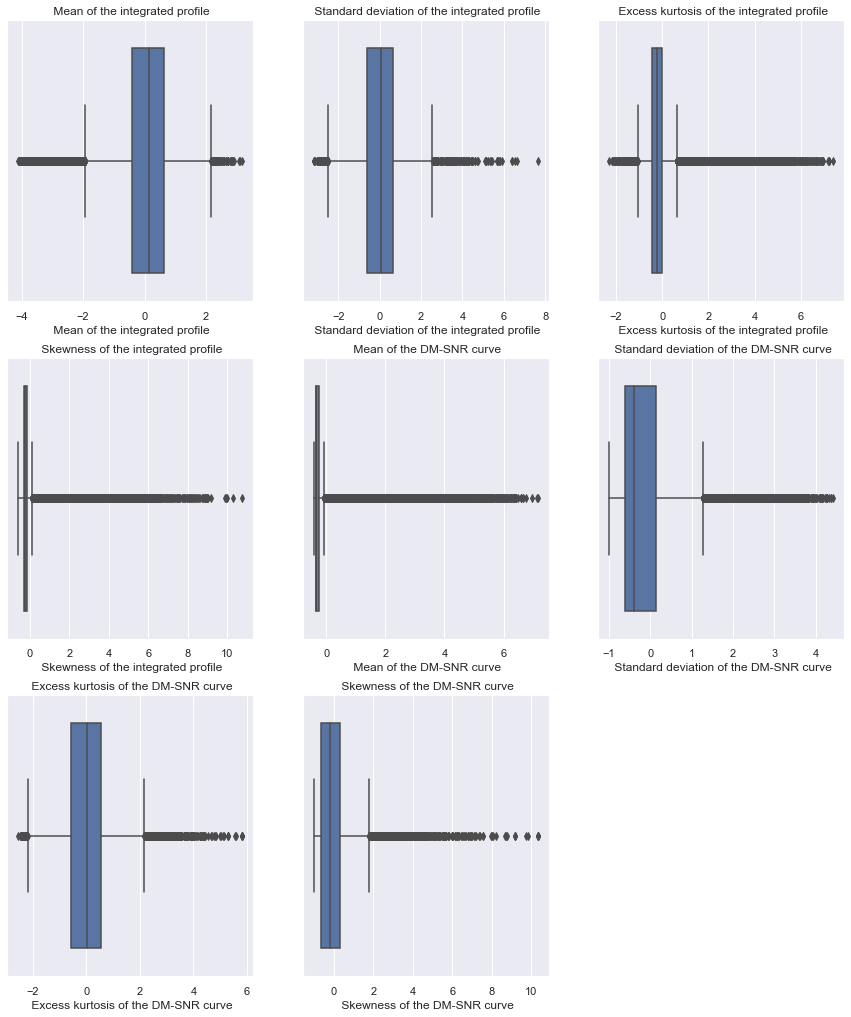

In [22]:
df5 = df1[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve']]
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df5):
  plt.subplot(5,3,i[0]+1)
  ax = sns.boxplot(i[1],data=df5).set(title='{}'.format(i[1]))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

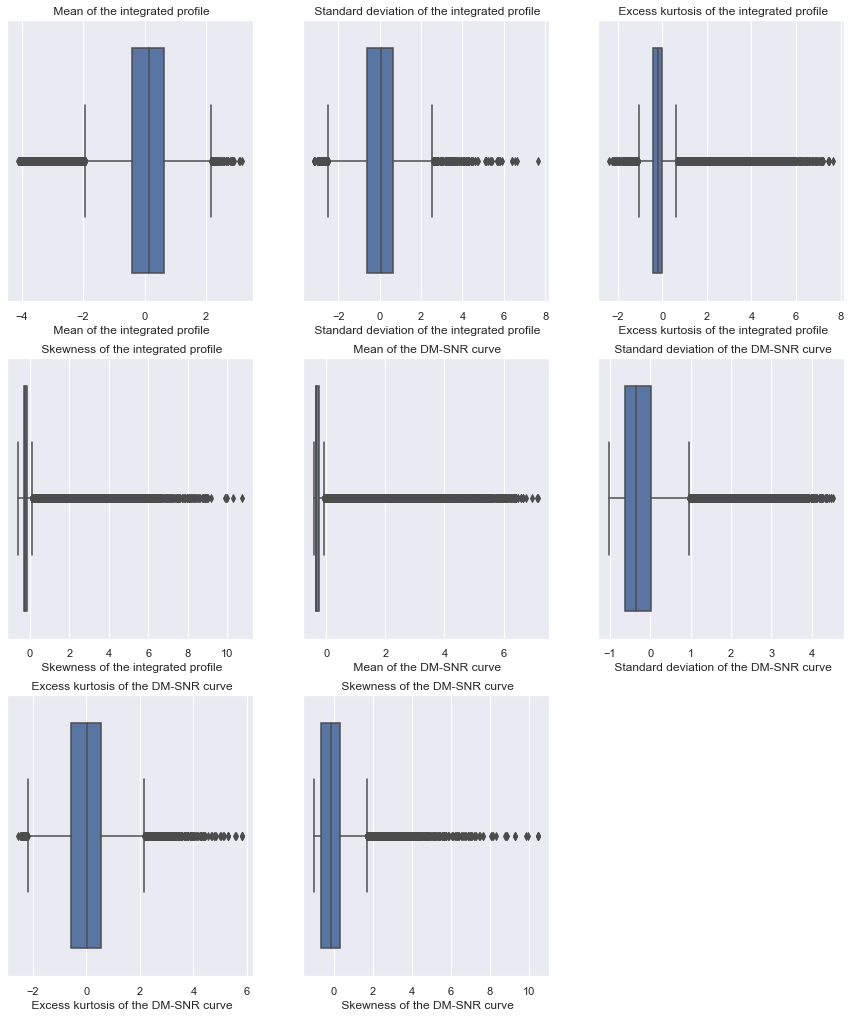

In [23]:
df6 = df3[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve']]
fig2 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df6):
  plt.subplot(5,3,i[0]+1)
  ax = sns.boxplot(i[1],data=df6).set(title='{}'.format(i[1]))
plt.show()

**As per the box plot the outlers are higher in all the variables** 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

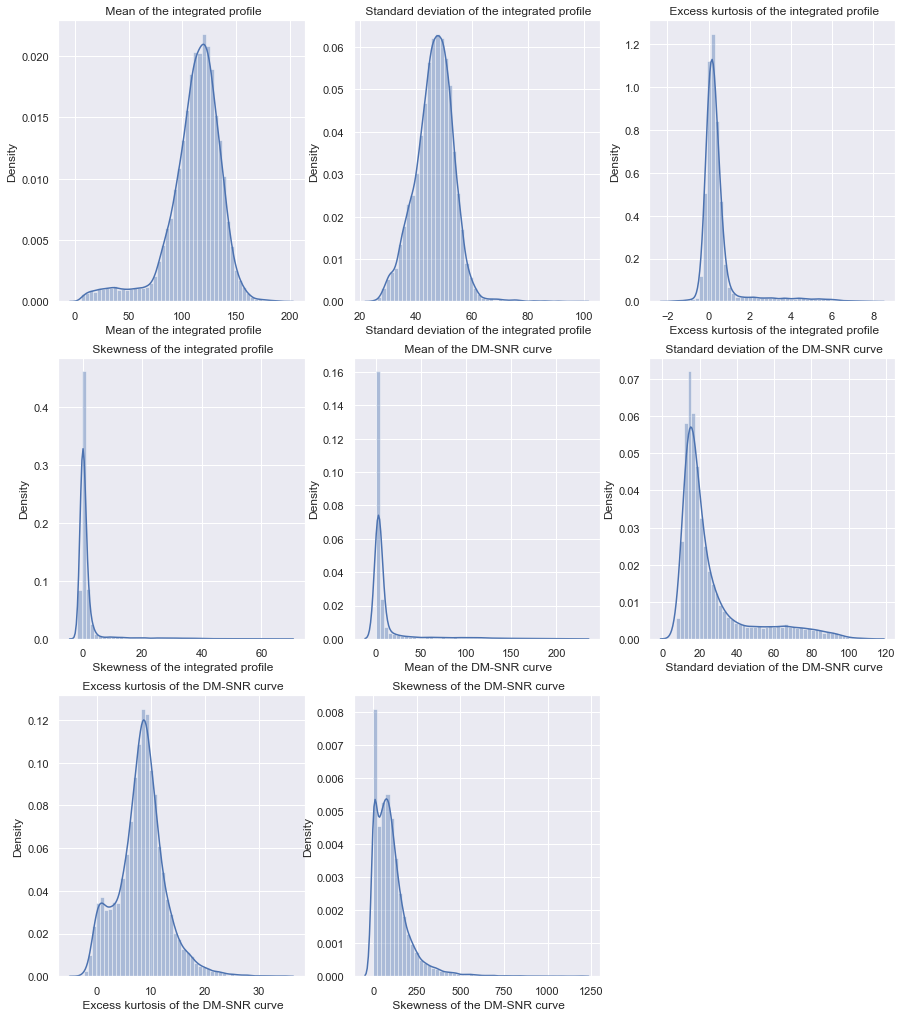

In [24]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df5):
  plt.subplot(5,3,i[0]+1)
  ax = sns.distplot(df2[i[1]]).set(title='{}'.format(i[1]))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

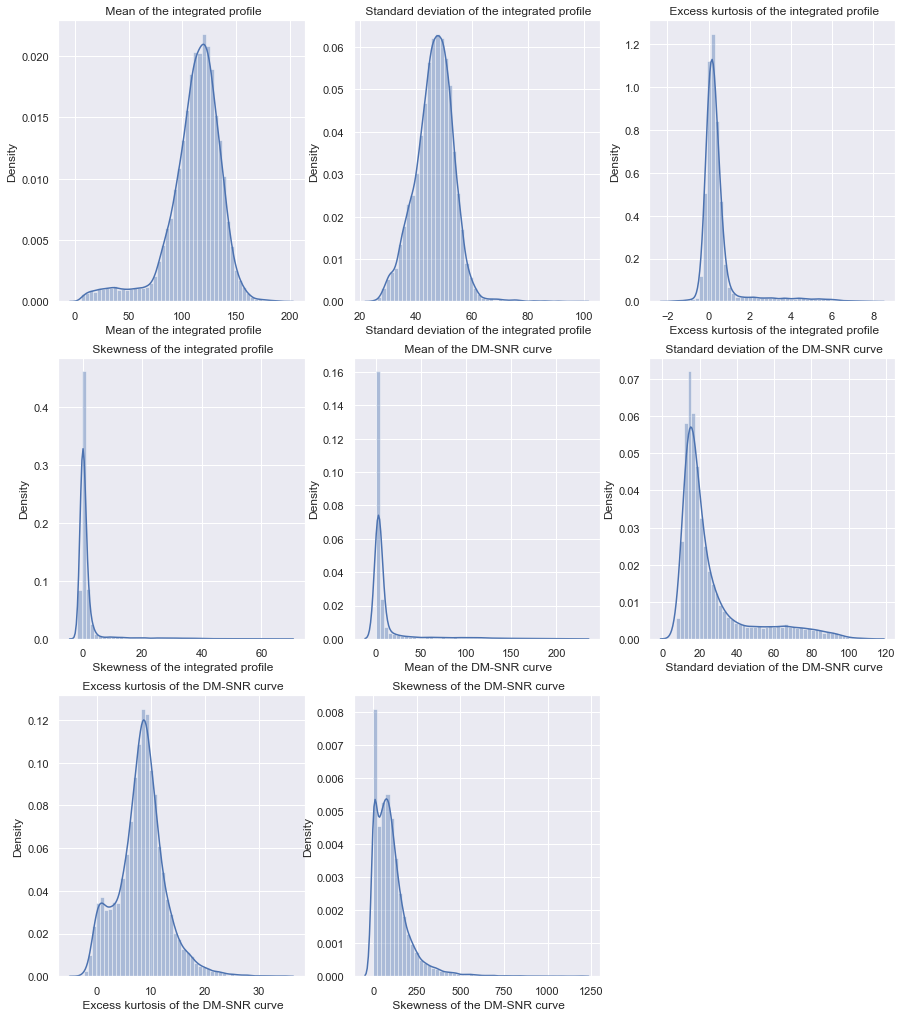

In [25]:
fig4 = plt.figure(figsize=(15,30))
sns.set(font_scale=1)
for i  in enumerate(df6):
  plt.subplot(5,3,i[0]+1)
  ax = sns.distplot(df2[i[1]]).set(title='{}'.format(i[1]))
plt.show()

As per the normalisation plot the data is observed as skewed towards one tailed exist

**Outlier using the IQR method**

In [26]:

def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df100 = df[df[column] > upper]
    df200 = df[df[column] < lower]
    return print('Total number of outliers are', df100.shape[0]+ df200.shape[0])

print(" Mean of the integrated profile ")
out_iqr(df1,' Mean of the integrated profile')
df10 = df1[(df1[' Mean of the integrated profile'] < upper) | (df1[' Mean of the integrated profile'] > lower)]
print(" ------------------------------------------------------- ")

print(" Standard deviation of the integrated profile ")
out_iqr(df10,' Standard deviation of the integrated profile')
df11 = df10[(df10[' Standard deviation of the integrated profile'] < upper) | (df10[' Standard deviation of the integrated profile'] > lower)]
print(" ------------------------------------------------------- ")

print(" Excess kurtosis of the integrated profile ")
out_iqr(df11,' Excess kurtosis of the integrated profile')
df12 = df11[(df11[' Excess kurtosis of the integrated profile'] < upper) | (df11[' Excess kurtosis of the integrated profile'] > lower)]
print(" ------------------------------------------------------- ")

print(" Skewness of the integrated profile ")
out_iqr(df12,' Skewness of the integrated profile')
df13 = df12[(df12[' Skewness of the integrated profile'] < upper) | (df12[' Skewness of the integrated profile'] > lower)]
print(" ------------------------------------------------------- ")

print(" Mean of the DM-SNR curve ")
out_iqr(df13,' Mean of the DM-SNR curve')
df14 = df13[(df13[' Mean of the DM-SNR curve'] < upper) | (df13[' Mean of the DM-SNR curve'] > lower)]
print(" ------------------------------------------------------- ")

print(" Standard deviation of the DM-SNR curve ")
out_iqr(df14,' Standard deviation of the DM-SNR curve')
df15 = df14[(df14[' Standard deviation of the DM-SNR curve'] < upper) | (df14[' Standard deviation of the DM-SNR curve'] > lower)]
print(" ------------------------------------------------------- ")

print(" Excess kurtosis of the DM-SNR curve ")
out_iqr(df15,' Excess kurtosis of the DM-SNR curve')
df16 = df15[(df15[' Excess kurtosis of the DM-SNR curve'] < upper) | (df15[' Excess kurtosis of the DM-SNR curve'] > lower)]
print(" ------------------------------------------------------- ")

print(" Skewness of the DM-SNR curve ")
out_iqr(df16,' Skewness of the DM-SNR curve')
df17 = df16[(df16[' Skewness of the DM-SNR curve'] < upper) | (df16[' Skewness of the DM-SNR curve'] > lower)]
print(" ------------------------------------------------------- ")


 Mean of the integrated profile 
The IQR is 1.0196486431997438
The lower bound value is -1.9251611881353756
The upper bound value is 2.1534333846635993
Total number of outliers are 1030
 ------------------------------------------------------- 
 Standard deviation of the integrated profile 
The IQR is 1.2636543383309706
The lower bound value is -2.505377028859251
The upper bound value is 2.549240324464631
Total number of outliers are 262
 ------------------------------------------------------- 
 Excess kurtosis of the integrated profile 
The IQR is 0.4218060064940721
The lower bound value is -1.0607202530903794
The upper bound value is 0.6265037728859091
Total number of outliers are 1707
 ------------------------------------------------------- 
 Skewness of the integrated profile 
The IQR is 0.18099896805381138
The lower bound value is -0.5890945818897504
The upper bound value is 0.13490129032549525
Total number of outliers are 1901
 -----------------------------------------------------

In [27]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


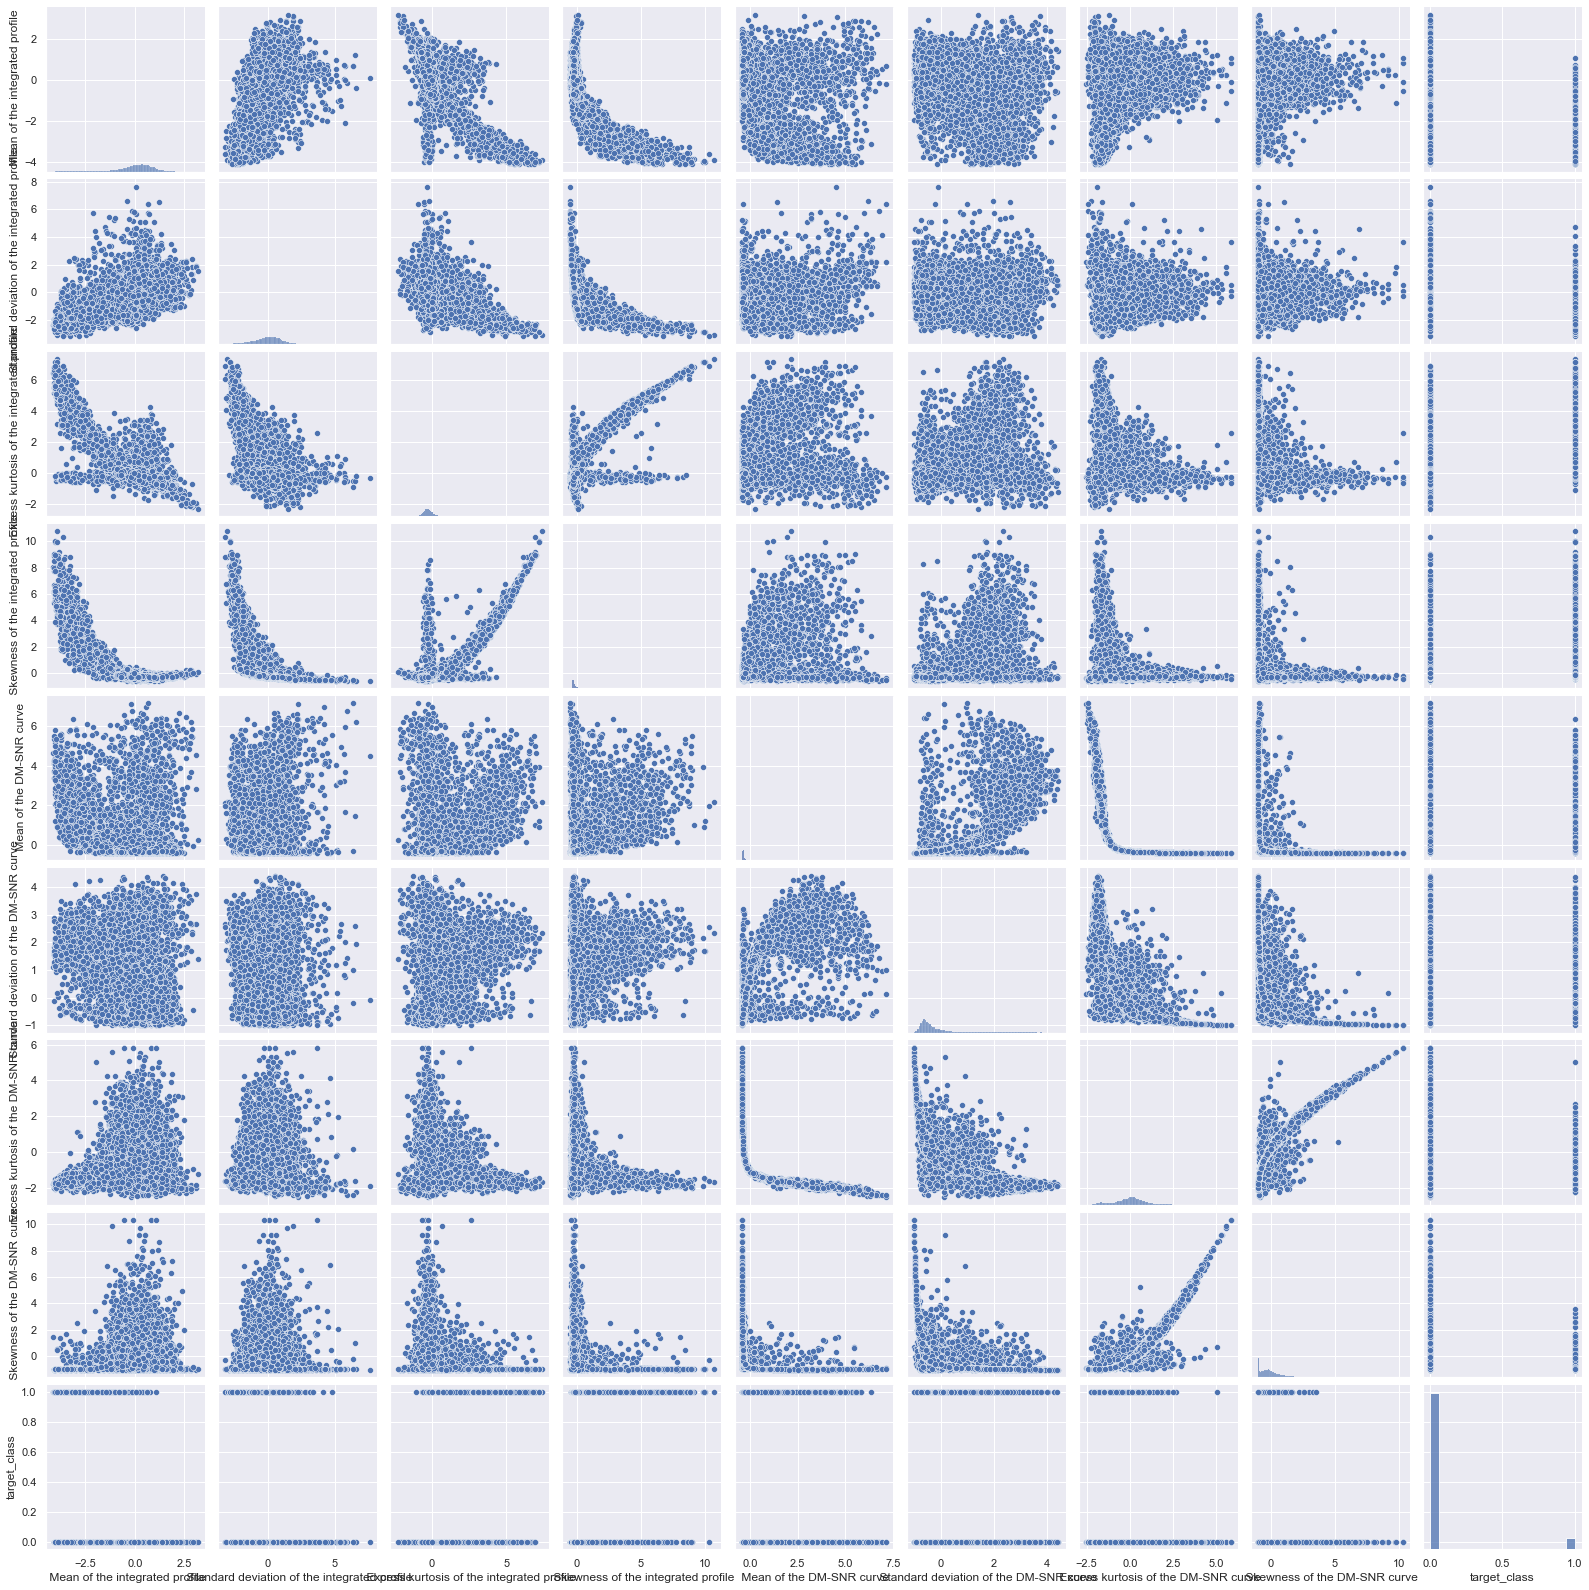

In [28]:
sns.pairplot(df17)

C:\Users\StrLab 4\AppData\Local\Temp\ipykernel_10864\2563421902.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


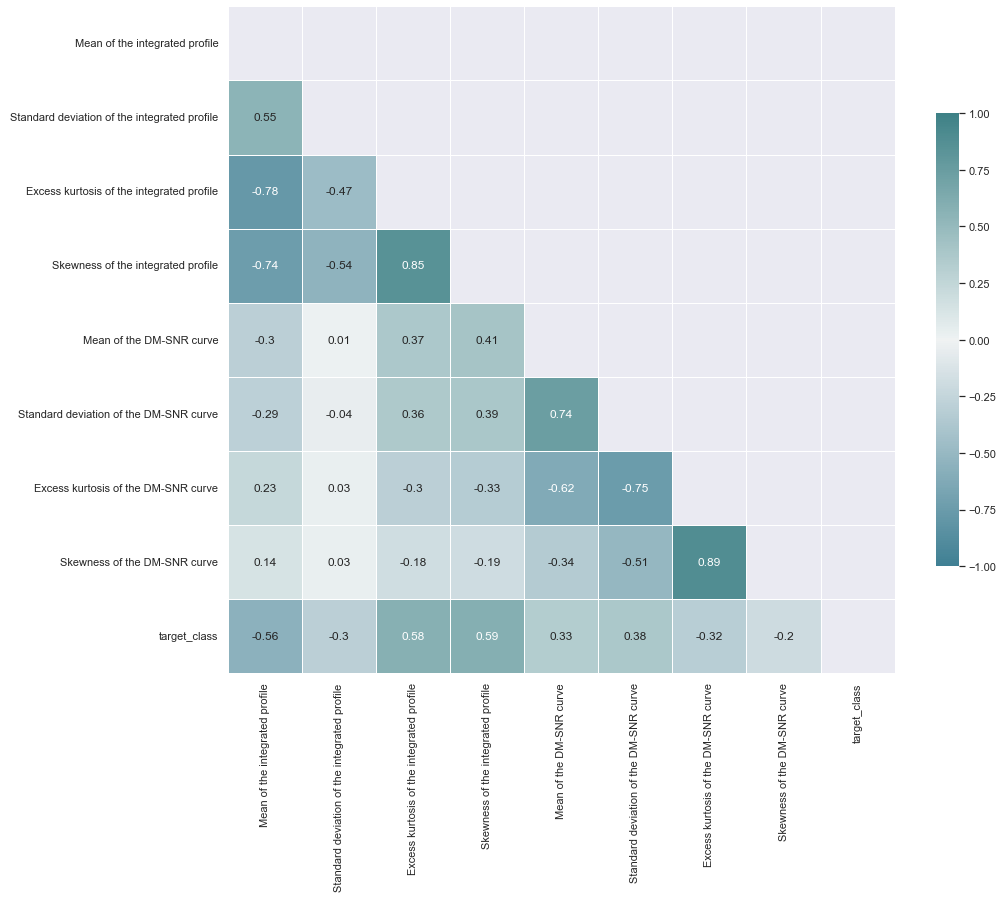

In [29]:
corr = df17.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f1, ax1 = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.tight_layout()
plt.show()

- Based on the correlation analysis there is multicollinearity in available dataset. These will impact accuracy of the result.
- Skewness of the integrated profile, Excess kurtosis of the integrated profile, skewness of the DM-SNR curve, Excess kurtosis of the DM_SNR curve are highly correlated.

# Train_Test_Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#split the data into input features and target.
X = df17.iloc[:, 0:-1].values
y = df17.iloc[:,-1].values

In [32]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)


In [33]:
# importing support vector classifier (SVC) from sklearn for nect operations
# SVC always works best for low dimensional data
from sklearn.svm import SVC

In [34]:
#- Kernel Function is a method used to take data as input and transform into the required form of processing data
# Kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred_test_rbf ))
np.mean(pred_test_rbf==y_test)


[[4881  125]
 [ 103  261]]


0.9575418994413408

In [35]:

print(classification_report(y_test,pred_test_rbf))


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5006
         1.0       0.68      0.72      0.70       364

    accuracy                           0.96      5370
   macro avg       0.83      0.85      0.84      5370
weighted avg       0.96      0.96      0.96      5370



In [36]:

def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df100 = df[df[column] > upper]
    df200 = df[df[column] < lower]
    return print('Total number of outliers are', df100.shape[0]+ df200.shape[0])

print(" Mean of the integrated profile ")
out_iqr(df3,' Mean of the integrated profile')
df20 = df3[(df3[' Mean of the integrated profile'] < upper) | (df3[' Mean of the integrated profile'] > lower)]
print(" ------------------------------------------------------- ")

print(" Standard deviation of the integrated profile ")
out_iqr(df20,' Standard deviation of the integrated profile')
df21 = df20[(df20[' Standard deviation of the integrated profile'] < upper) | (df20[' Standard deviation of the integrated profile'] > lower)]
print(" ------------------------------------------------------- ")

print(" Excess kurtosis of the integrated profile ")
out_iqr(df21,' Excess kurtosis of the integrated profile')
df22 = df21[(df21[' Excess kurtosis of the integrated profile'] < upper) | (df21[' Excess kurtosis of the integrated profile'] > lower)]
print(" ------------------------------------------------------- ")

print(" Skewness of the integrated profile ")
out_iqr(df22,' Skewness of the integrated profile')
df23 = df22[(df22[' Skewness of the integrated profile'] < upper) | (df22[' Skewness of the integrated profile'] > lower)]
print(" ------------------------------------------------------- ")

print(" Mean of the DM-SNR curve ")
out_iqr(df23,' Mean of the DM-SNR curve')
df24 = df23[(df23[' Mean of the DM-SNR curve'] < upper) | (df23[' Mean of the DM-SNR curve'] > lower)]
print(" ------------------------------------------------------- ")

print(" Standard deviation of the DM-SNR curve ")
out_iqr(df24,' Standard deviation of the DM-SNR curve')
df25 = df24[(df24[' Standard deviation of the DM-SNR curve'] < upper) | (df24[' Standard deviation of the DM-SNR curve'] > lower)]
print(" ------------------------------------------------------- ")

print(" Excess kurtosis of the DM-SNR curve ")
out_iqr(df25,' Excess kurtosis of the DM-SNR curve')
df26 = df25[(df25[' Excess kurtosis of the DM-SNR curve'] < upper) | (df25[' Excess kurtosis of the DM-SNR curve'] > lower)]
print(" ------------------------------------------------------- ")

print(" Skewness of the DM-SNR curve ")
out_iqr(df26,' Skewness of the DM-SNR curve')
df27 = df26[(df26[' Skewness of the DM-SNR curve'] < upper) | (df26[' Skewness of the DM-SNR curve'] > lower)]
print(" ------------------------------------------------------- ")


 Mean of the integrated profile 
The IQR is 1.0196486431997438
The lower bound value is -1.9251611881353756
The upper bound value is 2.1534333846635993
Total number of outliers are 1030
 ------------------------------------------------------- 
 Standard deviation of the integrated profile 
The IQR is 1.2636543383309706
The lower bound value is -2.505377028859251
The upper bound value is 2.549240324464631
Total number of outliers are 262
 ------------------------------------------------------- 
 Excess kurtosis of the integrated profile 
The IQR is 0.42517587079567354
The lower bound value is -1.0629396769891852
The upper bound value is 0.6377638061935089
Total number of outliers are 1428
 ------------------------------------------------------- 
 Skewness of the integrated profile 
The IQR is 0.18099896805381138
The lower bound value is -0.5890945818897504
The upper bound value is 0.13490129032549525
Total number of outliers are 1901
 ----------------------------------------------------

In [37]:
#split the data into input features and target.
X = df1.iloc[:, 0:-1].values
y = df1.iloc[:,-1].values

#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

# importing support vector classifier (SVC) from sklearn for nect operations
# SVC always works best for low dimensional data
from sklearn.svm import SVC

#- Kernel Function is a method used to take data as input and transform into the required form of processing data
# Kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred_test_rbf ))
np.mean(pred_test_rbf==y_test)


[[4920  109]
 [  78  263]]


0.9651769087523278

In [38]:
#split the data into input features and target.
X = df27.iloc[:, 0:-1].values
y = df27.iloc[:,-1].values

#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

# importing support vector classifier (SVC) from sklearn for nect operations
# SVC always works best for low dimensional data
from sklearn.svm import SVC

#- Kernel Function is a method used to take data as input and transform into the required form of processing data
# Kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred_test_rbf ))
np.mean(pred_test_rbf==y_test)

[[4903  119]
 [  88  260]]


0.9614525139664805

# Hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV


In [53]:

#SVM
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'],
 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = model_rbf,
 param_grid = parameters,
 scoring = 'accuracy',
 cv = 10,
 n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy_svm = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_svm)
print(best_parameters)

0.9607279270963746
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
Before SVM hypertuning 
accuracy = 0.96

After SVM hypertunng also 
accuracy = 0.96